<a href="https://colab.research.google.com/github/Nsquare1994/COT5600/blob/master/COT_5600_HW2_SWAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

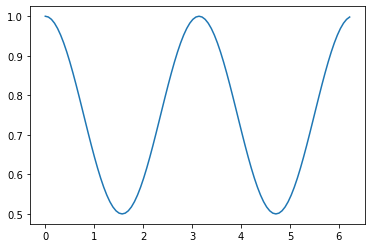

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

zero = np.array([[1.0], [0.0]])
one = np.array([[0.0], [1.0]])

plus_z = np.dot(zero, zero.T)
plus_o = np.dot(one, one.T)

hadamard = 1.0/np.sqrt(2)* np.array([[1,1],[1,-1]])

def kron_(*args):
  r = np.array([[1.0]])
  for i in args:
    r = np.kron(r, i)
  return r

def hadamard_test(n):
  h = kron_(hadamard, np.eye(4))
  h = np.dot(h, kron_(plus_z, np.eye(4)) + kron_(plus_o, n))
  h = np.dot(h, kron_(hadamard, np.eye(4)))
  return h

def measurements(f):
  #matrices
  m0 = kron_(plus_z, np.eye(4))
  m1 = kron_(plus_o, np.eye(4))
  #probability
  p0 = np.round(np.square(np.linalg.norm(np.dot(m0, f))),6)
  p1 = np.round(np.square(np.linalg.norm(np.dot(m1, f))),6)
  return p0, p1

def ket_(i, n):
  r = np.zeros((2**n,))
  r[i] = 1
  return r

def swap_test():
  s = np.outer(ket_(0,2), ket_(0,2)) + np.outer(ket_(1,2), ket_(2,2)) + np.outer(ket_(2,2), ket_(1,2)) + np.outer(ket_(3,2), ket_(3,2))
  return s

h = hadamard_test(swap_test())

t_ang = []
p0 = []

for i in range(100):
  i = i/100 
  ang2 = np.cos(2*np.pi*i)*zero + np.sin(2*np.pi*i)*one
  f = np.dot(h, kron_(zero, zero, ang2))
  prob0, prob1 = measurements(f)
  t_ang.append(i*2*np.pi)
  p0.append(prob0)

plt.plot(t_ang, p0)
plt.show()